<a href="https://colab.research.google.com/github/Seouyang/Today-I-Learned/blob/master/svm_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SVM(Support vector machines)

**Goal:** Find $\mathbf{w}$ that maximizes the margin $\frac{2}{||\mathbf{w}||}$, while correctly separating the training samples

$\iff$ Find $\mathbf{w}$ that minimizes $\frac{||\mathbf{w}||^2}{2}$ such that $(\mathbf{w}^T\mathbf{x}_i+w_0)t_i\geq 1$ for all $1\leq i \leq n$
 

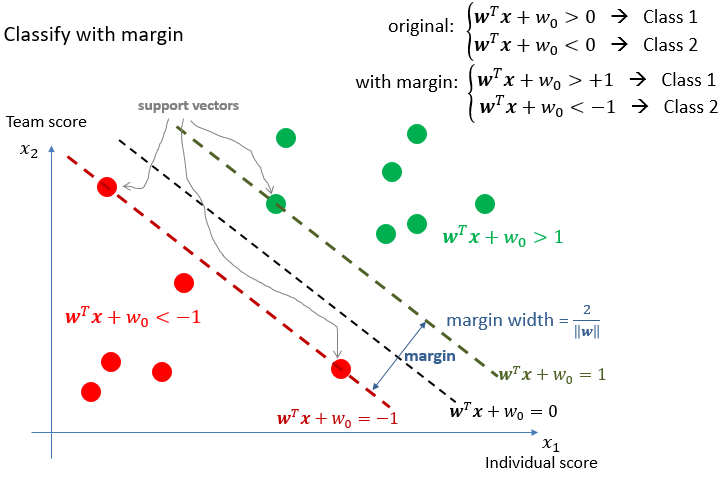


However, the above problem has some issues.


*   The solution may lead to overfitting.
*   The solution may not exist. (Data is not linearly separable)

To handle both issues, we add a penalty term on the loss function:

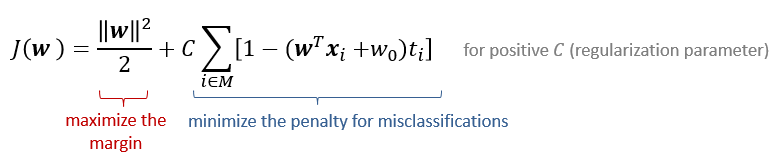

where $M$ is the misclassified dataset.

Regularization parameter $C$ controls the amount of penalty for misclassification. A very large $C$ may lead to overfitting, but a very small $C$ may lead to underfitting.

In [1]:
#use scikit-learn library to train SVM
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn import svm

**Task 1: The linearly separable case**


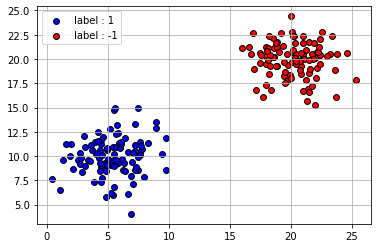

In [2]:
#generate samples from normal distributions
np.random.seed(10)
n = 100

#training data
X1 = np.random.normal(loc=(5, 10), scale=2, size=(n, 2))
X2 = np.random.normal(loc=(20, 20), scale=2, size=(n, 2))
T1 = np.ones(n)
T2 = np.ones(n) * -1
X_train = np.concatenate((X1, X2))
T_train = np.concatenate((T1, T2))

#test data
X1_test = np.random.normal(loc=(5, 10), scale=2, size=(n, 2))
X2_test = np.random.normal(loc=(20, 20), scale=2, size=(n, 2))
T1_test = np.ones(n)
T2_test = np.ones(n) * -1
X_test = np.concatenate((X1_test, X2_test))
T_test = np.concatenate((T1_test, T2_test))

plt.scatter(X_train[T_train==1][:, 0].T, X_train[T_train==1][:, 1].T, color='b', edgecolor='k', label='label : 1', s=35)
plt.scatter(X_train[T_train==-1][:, 0].T, X_train[T_train==-1][:, 1].T, color='r', edgecolor='k', label='label : -1', s=35)
plt.grid(True)
plt.legend()
plt.show()

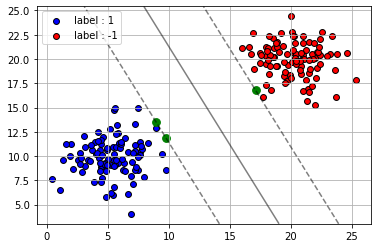

In [5]:
#linear support vector classification
clf = svm.SVC(kernel='linear', C=1)
clf.fit(X_train, T_train)

plt.scatter(X_train[T_train==1][:, 0].T, X_train[T_train==1][:, 1].T, color='b', edgecolor='k', label='label : 1', s=35)
plt.scatter(X_train[T_train==-1][:, 0].T, X_train[T_train==-1][:, 1].T, color='r', edgecolor='k', label='label : -1', s=35)
plt.grid(True)
plt.legend()

axes = plt.gca()
x_min, x_max = axes.get_xlim()
y_min, y_max = axes.get_ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 30), np.linspace(y_min, y_max, 30))
xy = np.vstack([xx.ravel(), yy.ravel()]).T
Z = clf.decision_function(xy).reshape(xx.shape)

#highlight support vectors & draw decision boundary and the parallel lines containing the support vectors
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=60, facecolors='g')
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
plt.show()

**Task 2: Handling outliers by changing regularization parameter**

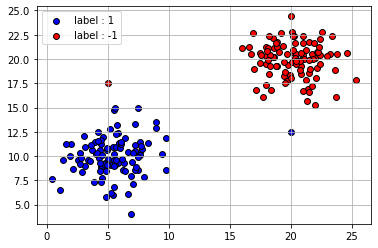

In [8]:
outlier_x1, outlier_x2 = np.array([[20, 12.5]]), np.array([[5, 17.5]])
outlier_t1, outlier_t2 = np.array([1]), np.array([-1])

X_train = np.concatenate((X1, X2, outlier_x1, outlier_x2))
T_train = np.concatenate((T1, T2, outlier_t1, outlier_t2))
plt.scatter(X_train[T_train==1][:, 0].T, X_train[T_train==1][:, 1].T, color='b', edgecolor='k', label='label : 1', s=35)
plt.scatter(X_train[T_train==-1][:, 0].T, X_train[T_train==-1][:, 1].T, color='r', edgecolor='k', label='label : -1', s=35)
plt.grid(True)
plt.legend()

axes = plt.gca()
x_min, x_max = axes.get_xlim()
y_min, y_max = axes.get_ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 30), np.linspace(y_min, y_max, 30))
grids = np.c_[xx.ravel(), yy.ravel()]
plt.show()

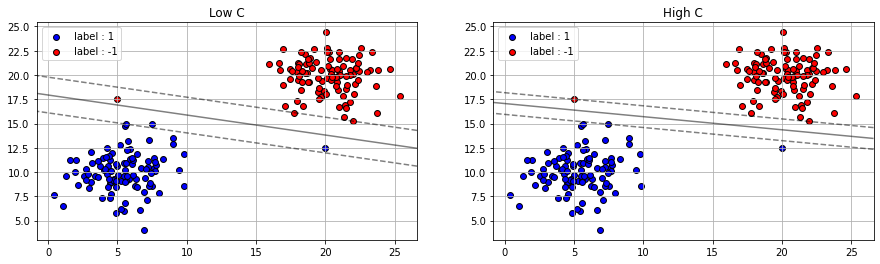

In [11]:
#linear support vector classification with different regularization parameter
clf_lowC = svm.SVC(kernel='linear', C=0.1)
clf_highC = svm.SVC(kernel='linear', C=10)

clf_lowC.fit(X_train, T_train)
clf_highC.fit(X_train, T_train)

xy = np.vstack([xx.ravel(), yy.ravel()]).T
Z_lowC = clf_lowC.decision_function(xy).reshape(xx.shape)
Z_highC = clf_highC.decision_function(xy).reshape(xx.shape)

plt.figure(figsize=(15, 4))

plt.subplot(121)
plt.scatter(X_train[T_train==1][:, 0].T, X_train[T_train==1][:, 1].T, color='b', edgecolor='k', label='label : 1', s=35)
plt.scatter(X_train[T_train==-1][:, 0].T, X_train[T_train==-1][:, 1].T, color='r', edgecolor='k', label='label : -1', s=35)
plt.grid(True)
plt.legend()
plt.contour(xx, yy, Z_lowC, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
plt.title('Low C')

plt.subplot(122)
plt.scatter(X_train[T_train==1][:, 0].T, X_train[T_train==1][:, 1].T, color='b', edgecolor='k', label='label : 1', s=35)
plt.scatter(X_train[T_train==-1][:, 0].T, X_train[T_train==-1][:, 1].T, color='r', edgecolor='k', label='label : -1', s=35)
plt.grid(True)
plt.legend()
plt.contour(xx, yy, Z_highC, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
plt.title('High C')
plt.show()

**Task 3: Non-linear SVM**

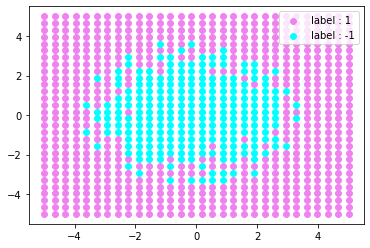

In [23]:
X1, X2 = np.meshgrid(np.linspace(-5, 5, 30), np.linspace(-5, 5, 30))
X1, X2 = X1.reshape(900, 1), X2.reshape(900, 1)
X_train = np.concatenate((X1, X2), axis=1)
T_train = np.ones(900)

for idx in range(len(X_train)):
  if X1[idx]**2 + X2[idx]**2 < 9 + np.random.randn(1)*3:
    T_train[idx] = -1

plt.scatter(X_train[T_train==1][:, 0].T, X_train[T_train==1][:, 1].T, color='violet', label='label : 1', s=35)
plt.scatter(X_train[T_train==-1][:, 0].T, X_train[T_train==-1][:, 1].T, color='aqua', label='label : -1', s=35)
plt.legend(loc='upper right')
plt.show()

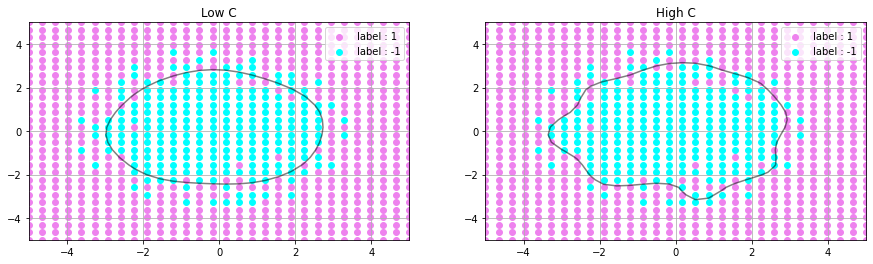

In [25]:
#train SVM with non-linear kernel
clf_lowC = svm.SVC(kernel='rbf', gamma='auto', C=0.1)
clf_highC = svm.SVC(kernel='rbf', gamma='auto', C=10)

clf_lowC.fit(X_train, T_train)
clf_highC.fit(X_train, T_train)

xx, yy = np.meshgrid(np.linspace(-5, 5, 30), np.linspace(-5, 5, 30))
Z_lowC = clf_lowC.decision_function(X_train).reshape(xx.shape)
Z_highC = clf_highC.decision_function(X_train).reshape(xx.shape)

plt.figure(figsize=(15, 4))

plt.subplot(121)
plt.scatter(X_train[T_train==1][:, 0].T, X_train[T_train==1][:, 1].T, color='violet', label='label : 1', s=35)
plt.scatter(X_train[T_train==-1][:, 0].T, X_train[T_train==-1][:, 1].T, color='aqua', label='label : -1', s=35)
plt.grid(True)
plt.legend(loc='upper right')
plt.contour(xx, yy, Z_lowC, colors='k', levels=[0], alpha=0.5)
plt.title('Low C')

plt.subplot(122)
plt.scatter(X_train[T_train==1][:, 0].T, X_train[T_train==1][:, 1].T, color='violet', label='label : 1', s=35)
plt.scatter(X_train[T_train==-1][:, 0].T, X_train[T_train==-1][:, 1].T, color='aqua',label='label : -1', s=35)
plt.grid(True)
plt.legend(loc='upper right')
plt.contour(xx, yy, Z_highC, colors='k', levels=[0], alpha=0.5)
plt.title('High C')
plt.show()

**Task 4: Experiments with Iris data**

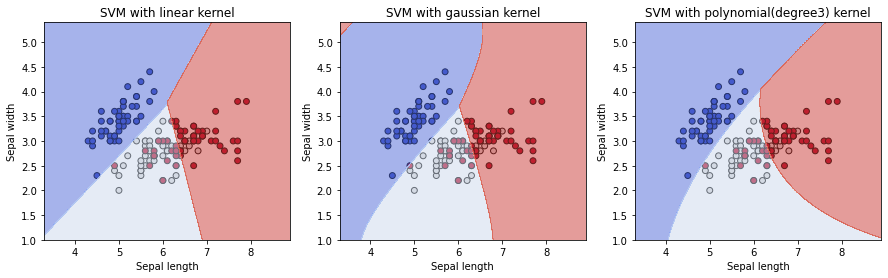

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

iris = datasets.load_iris()

X = iris.data[:, :2]
y = iris.target
X0, X1 = X[:, 0], X[:, 1]

x_min, x_max = X0.min() - 1, X0.max() + 1
y_min, y_max = X1.min() - 1, X1.max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 1000), np.linspace(y_min, y_max, 1000))

C = 0.1

#svm with linear kernel
clf1 = svm.SVC(kernel='linear', C=C)
clf1.fit(X, y)
Z1 = clf1.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

#svm with rbf kernel
clf2 = svm.SVC(kernel='rbf', gamma='auto', C=C)
clf2.fit(X, y)
Z2 = clf2.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

#svm with polynomial kernel
clf3 = svm.SVC(kernel='poly', degree=3, gamma='auto', C=C)
clf3.fit(X, y)
Z3 = clf3.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(15, 4))

plt.subplot(131)
plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, edgecolor='k', s=35)
plt.contourf(xx, yy, Z1, cmap=plt.cm.coolwarm, alpha=0.5)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('SVM with linear kernel')

plt.subplot(132)
plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, edgecolor='k', s=35)
plt.contourf(xx, yy, Z2, cmap=plt.cm.coolwarm, alpha=0.5)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('SVM with gaussian kernel')

plt.subplot(133)
plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, edgecolor='k', s=35)
plt.contourf(xx, yy, Z3, cmap=plt.cm.coolwarm, alpha=0.5)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('SVM with polynomial(degree3) kernel')
plt.show()

Reference: KAIST EE488 lecture practice material